In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.util import ngrams

%matplotlib inline


from matplotlib import style
  
print(plt.style.available)

plt.style.use('seaborn-dark-palette')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Step 1: Convert job descriptions to individual corpus (s) , based on key value. In this case whether the position is a 'analys'' or 'scientist'.

In this case, each job description has 2-3 individual strings, which represent the entire qualifications bullet points or responsibilities sections

In [40]:
df = pd.read_excel("data.xlsx")

In [41]:
scientist = {}
analyst = {}

for i, each in enumerate(df["skills"]):
    title = df['Key'][i].lower().split()
    for word in title:
        if word == "scientist":
            scientist[df['Key'][i]] = each
            break

for i, each in enumerate(df["skills"]):
    title = df['Key'][i].lower().split()
    for word in title:
        if word == "analyst":  # change the string and dictionary entry below to group custom positions
            analyst[df['Key'][i]] = each
            break

Takes the dictionary of job title / description pairs and concatentates all of the posts into one string

In [42]:
sci_skills = ''.join(list(scientist.values()))

ana_skills = ''.join(list(analyst.values()))

<br>

--- 

<br>

# Filtering Out Noise

<br>

There are two options to focus your wordclouds


1.) Some generic words could be added to the stop words, if trying to get more specific like computer programming languages

2.) Rather than filterting out stopwords, create a set of keywords and filter the tokens to just that set

<br>




Before testing both we'll create the initial set of tokens


In [43]:
stop = stopwords.words('english')

stop_additions = ['experience',
                 'strong',
                 'ability',
                 'preffered',
                 'technical',
                 'knowledge',
                 'work',
                 'proficiency',
                 'year',
                 'business',
                 'using',
                 'professional',
                 'working',
                 'preferred',
                 'skill',
                 'including',
                 'project',
                 'familiarity',
                 'analysis',
                 'relevant',
                 'plus',
                 'excellent']

stop.extend(stop_additions)

lem = 'exceptions' function using list to avoid truncation of nouns such as 'sas' or 'gis', since NLTK thinks they are plural's during lematization

<br>

parse = generic function for tokenizing and lematizing text - specific to option 1 which includes all possible word canditates

In [44]:
exceptions = ['sas',
              'gis',
              'pandas',
              'keras',
              'masters',
              'r']

def lem(word):
    lemmatizer = WordNetLemmatizer()
    if word not in exceptions:
        out = lemmatizer.lemmatize(word)
    else:
        out = word
    return out


def parse(provided_list):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(provided_list.lower())
    no_stop_words = [token for token in tokens if token not in stop]
    return no_stop_words

def parse_lem(provided_list):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(provided_list.lower())
    tokens_lem = [lem(i) for i in tokens]
    no_stop_words = [token for token in tokens_lem if token not in stop]

    return no_stop_words

Create initial tokens for testing of new n-gram analysis 

In [45]:
sci = parse_lem(sci_skills)

## Option 1

<br>

Analyzing posts by all possible words, aside from basic stop words and additions to such filtering words

<br>

wordcloud api reference http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

In [46]:
def wordclouds(tokens, plot_title):
    text = pd.Series(tokens).value_counts()
    wordcloud = WordCloud(max_font_size=200, 
                          max_words=100, 
                          background_color="black",
                         collocations = True,
                         width=1000,
                         height = 600,
                         colormap = 'rainbow').fit_words(text)
    plt.figure(dpi = 300)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(plot_title)
    plt.show()
    return text

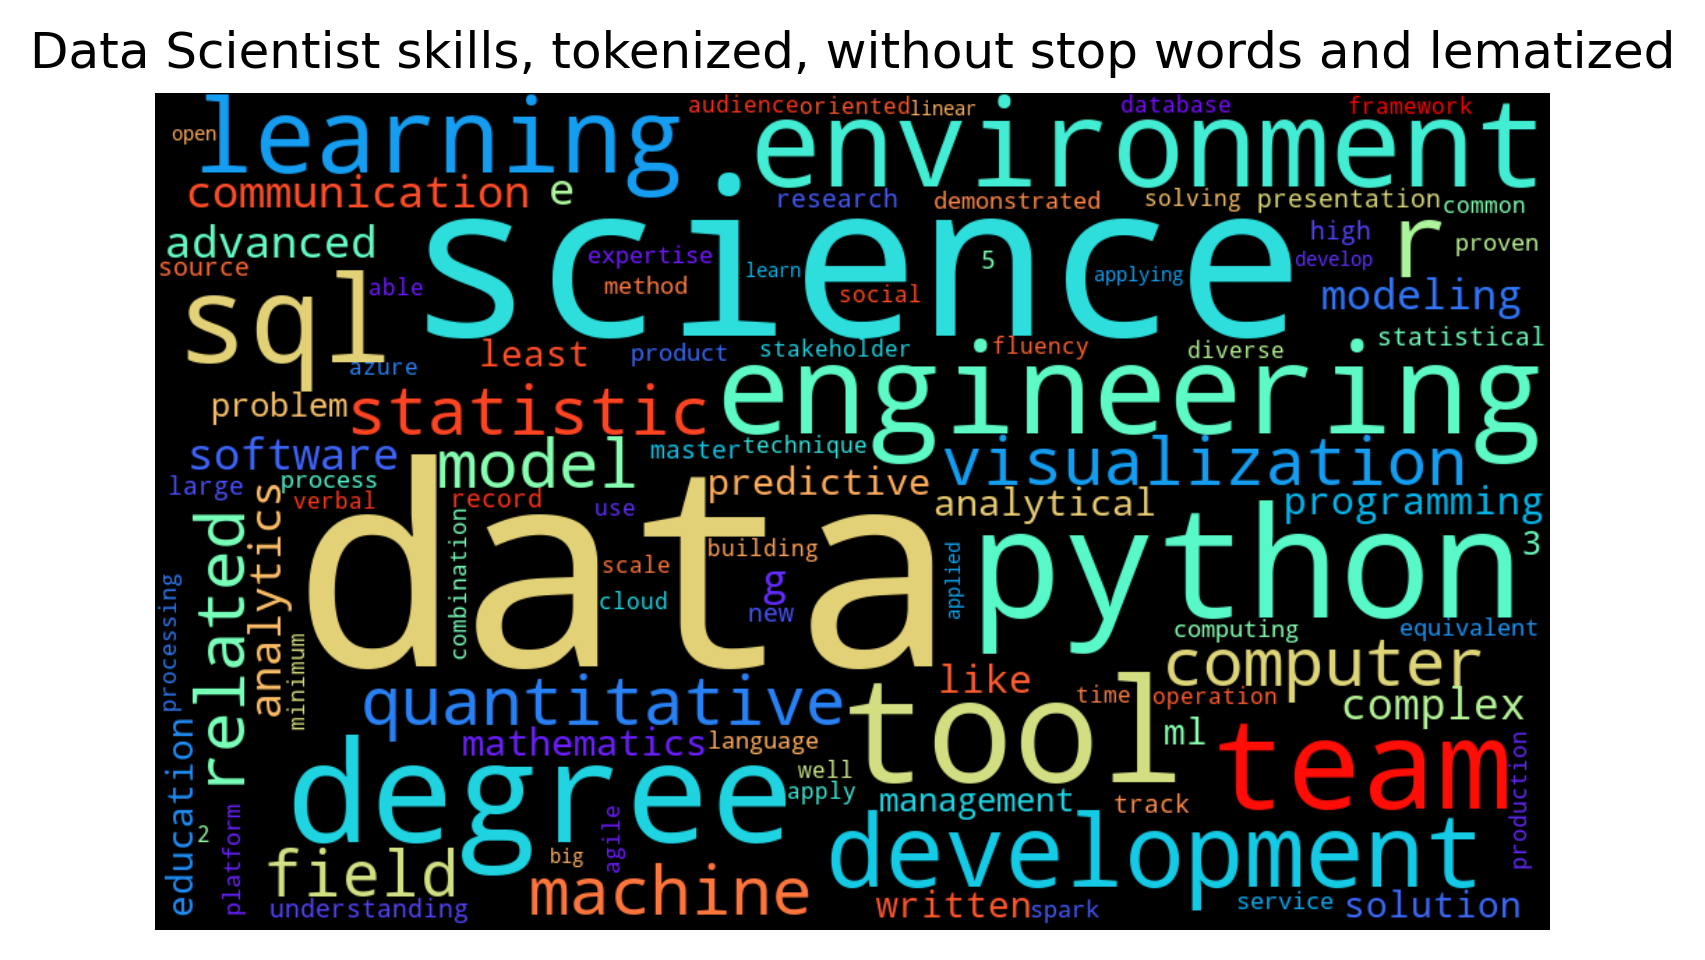

In [47]:
all_words = wordclouds(sci, 'Data Scientist skills, tokenized, without stop words and lematized')

# Option 2

<br>
<br>

Since my discipline focuses on specific programming languages, data engineering or cloud platforms, and specific statistical models, I'll start off with a list of skills from my resume, and add a few extra languages or methods I have yet to learn but still popular in the field. These lists of skills will be stored as individual lists, as they can easily be concatenated, but will allow to search for example, the most popular machine learning models or most demanded GIS software

<br>

storing as a dictionary of lists might make things easier down the road

<br>

In [48]:
buzzwords = {

            'software': ['excel', 'powerpoint', 'word', 'github', 'tableau'],

            'languages': ['bash', 'sas', 'sql', 'html', 'css', 'git', 'javaScript', 'linux','c', 'c#', 'c++', 'julia'],

            'r': ['tidyverse', 'ggplot', 'stringr', 'rtools', 'regex'],

            'forecasting': ['time series', 'exponential smoothing', 'arima', 'vector autoregressive', 'var', 'prophet', 'matrix profiling'],

            'clustering': ['dbscan', 'k-means', 'pca', 'kmeans'],

            'bayes': ['bayesian inference', 'markov chain monte carlo', 'naïve bayes', 'naive bayes'],

            'gis': ['qgis', 'arcgis', 'rasterio', 'google earth engine', 'remote sensing', 'point clouds', 'leaflet'],

            'cloud': ['aws', 'gcs', 'google cloud', 'auto ml', 'cloud storage', 'azure', 'api'],

            'bigdata': ['hadoop', 'apache spark', 'hive', 'dask', 'kubernetes', 'parallel processing'],

            'models': ['classification', 'regression', 'decision trees', 'lasso', 'ridge', 'regularization', 'random forest', 'extra trees', 
                       'k-nearest neighbor', 'knn', 'support vector machines', 'svm', 'bootstrapping', 'bagging', 'boosting', 'gridsearch', 
                       'k-fold cross-validation', 'pipelines'],

            'ml': ['machine learning', 'deep learning', 'ai', 'artificial intelligence', 'neural networks', 'pipelines', 'rnn', 'cnn', 
                   'computer vision', 'roboflow', 'yolo', 'mask-r-cnn'],

            'nlp': ['natural language processing', 'count and tf-idf vectorizers', 'stemming', 'lemmatization', 'tokenization', 
                    'sentiment analysis', 'bert', 'genism', 'webscraping'],

            'python': ['pandas', 'scikit-learn', 'statsmodels', 'jupyter lab', 'nltk', 'stumpy', 'requests', 'plotly', 
                       'beautifulsoup', 'pytorch', 'tensorflow', 'bigquery']

}




all_keys = list(buzzwords.keys())
language_keys = ["languages", "r", "python"]
utils_keys =   ["software", "gis", "cloud", "bigdata"]
stats_keys =   ["ml", "models", "bayes", "clustering", "forecasting"]




def target_skills(keys):
    words = []
    for each in keys:
        words += buzzwords[each]
    return words+keys


Too Account for Bigrams and Tri Grams in this case, we'll make a new function to look one and two words ahead, and if that n-gram exists in our buzzwords we'll store it as the series and avoid adding the single token

<br>

the test string includes a bigram, a trigram, and a token that appear in the buzzwords criteria below, the output should three individual values

<br>

**the wordcloud library** automatically parses out bigrams if they are seperated by a space, so an underscore is used to preserve the compound noun for now

<br>

we'll avoid lematization for now since our filtering criteria is narrow


In [49]:
def option2(provided_list, filter_keys):
    tokens = parse(provided_list)
    criteria = target_skills(filter_keys)
    buzz = [token for token in tokens if token in criteria]
    
    # make bi-grams
    for i in range(0, (len(tokens)-1)):
        bigram = (tokens[i] + ' ' + tokens[i+1])
        if bigram in criteria:
            buzz.append(bigram.replace(' ', '-'))
            
    # make tri-grams
    for i in range(0, (len(tokens)-2)):
        trigram = (tokens[i] + ' ' + tokens[i+1] + ' ' + tokens[i+2])
        if trigram in criteria:
            buzz.append(trigram.replace(' ', '-'))

    return buzz

In [50]:
buzz_all = option2(sci_skills, all_keys)

In [51]:
buzz_lang = option2(sci_skills, language_keys)
buzz_util = option2(sci_skills, utils_keys)
buzz_stat = option2(sci_skills, stats_keys)

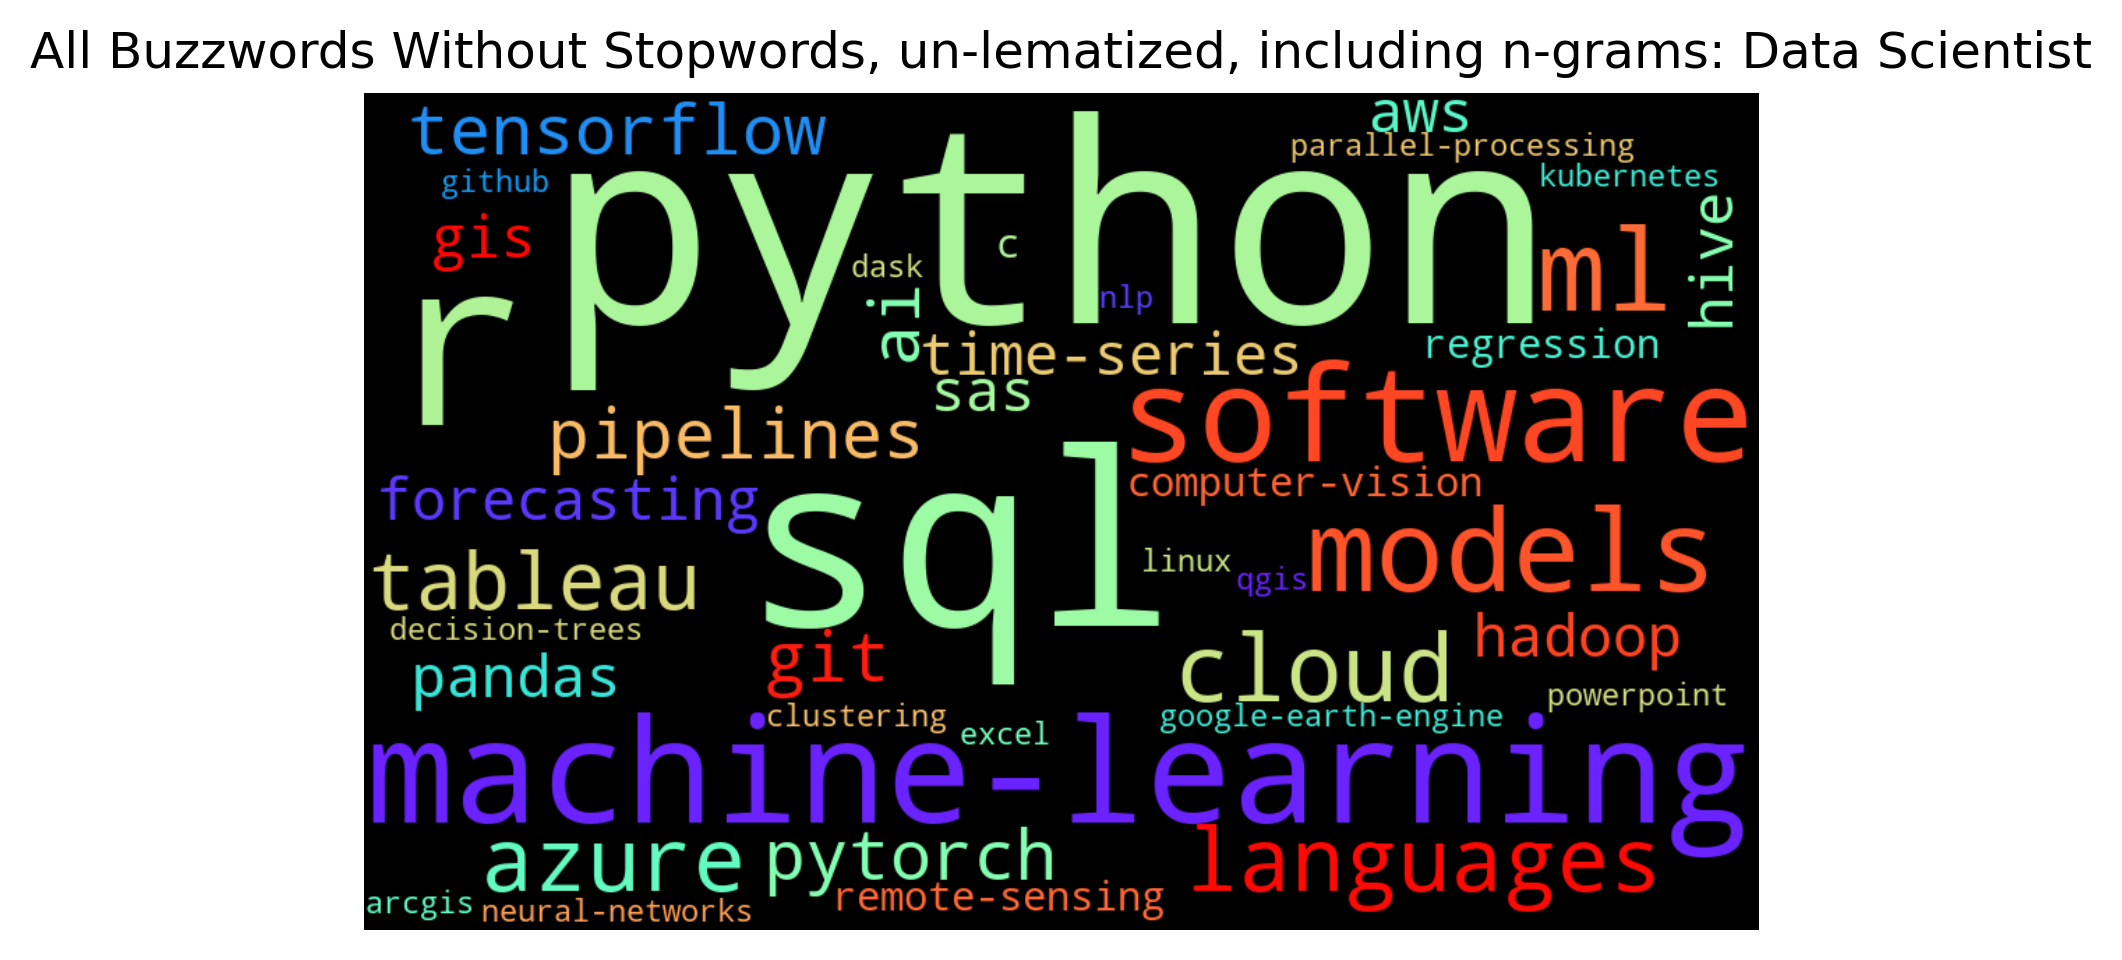

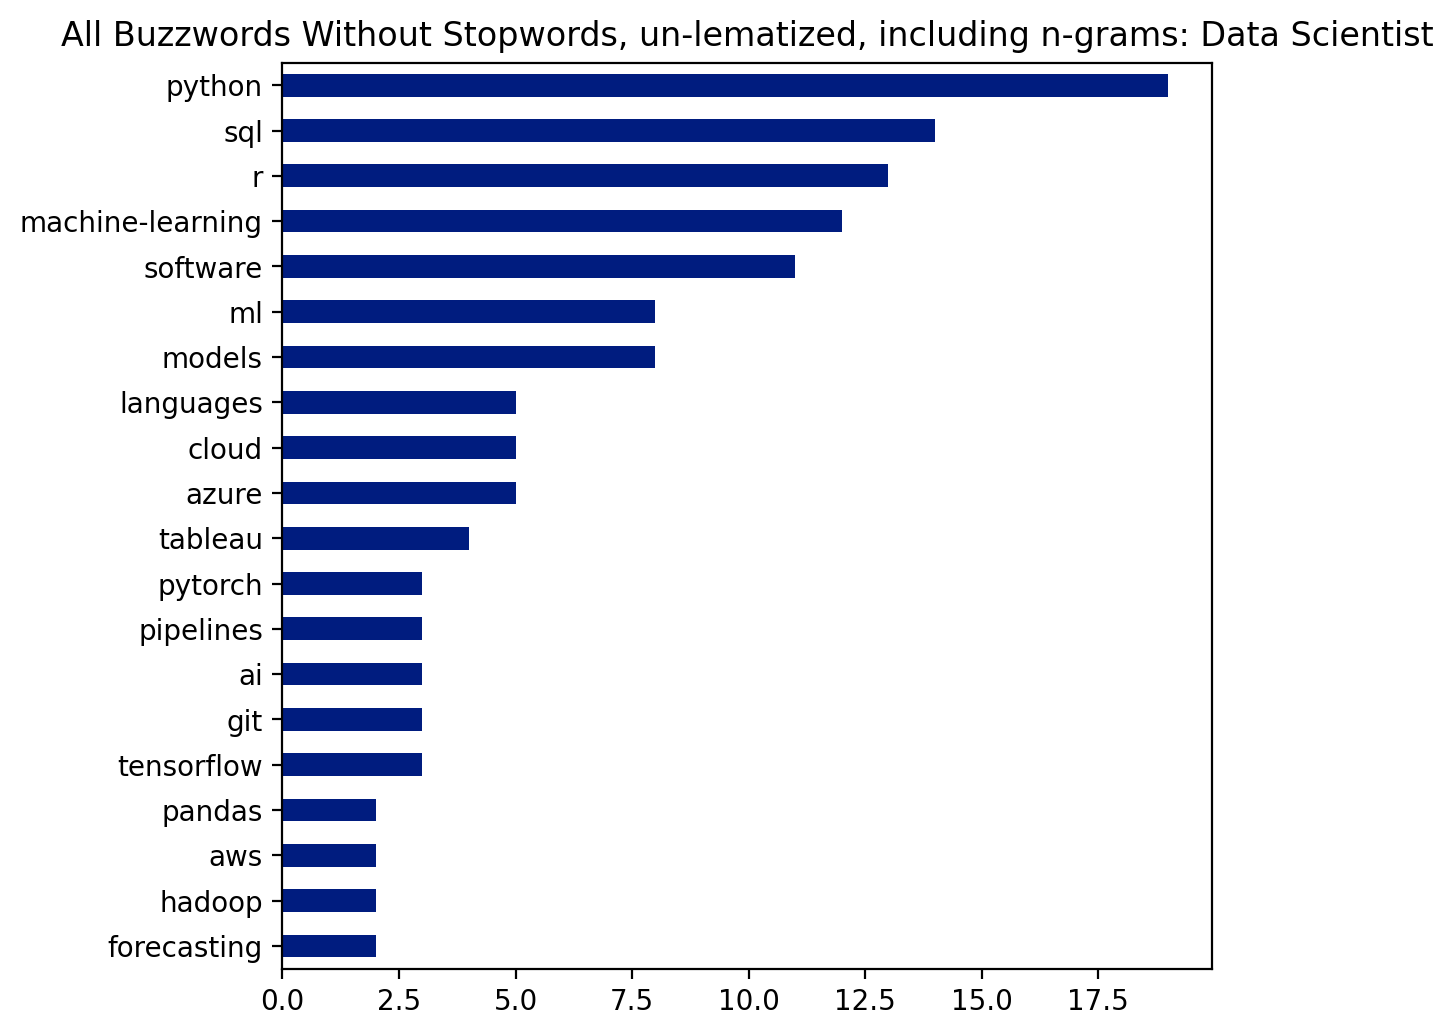

In [52]:


title = "All Buzzwords Without Stopwords, un-lematized, including n-grams: Data Scientist"

wordclouds(buzz_all, title)

plt.figure(dpi=200)
pd.Series(buzz_all).value_counts().head(20).sort_values().plot(kind='barh', figsize=(6,6))

plt.title(title);

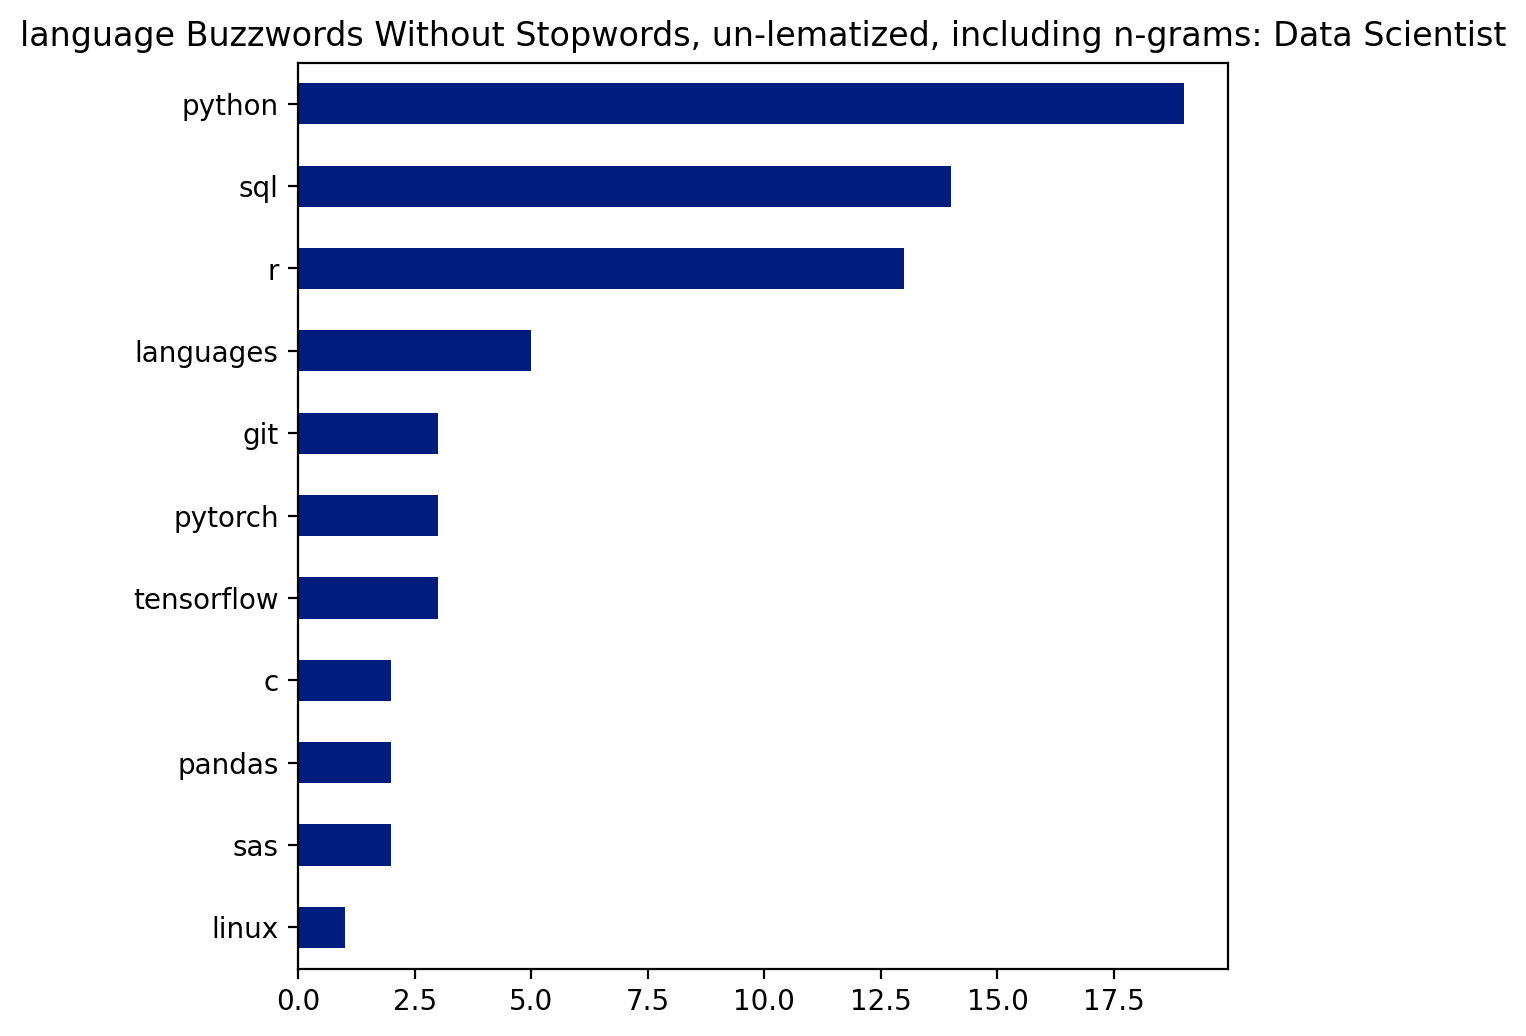

In [53]:
plt.figure(dpi=200)
pd.Series(buzz_lang).value_counts().head(20).sort_values().plot(kind='barh', figsize=(6,6))
plt.title("language Buzzwords Without Stopwords, un-lematized, including n-grams: Data Scientist");

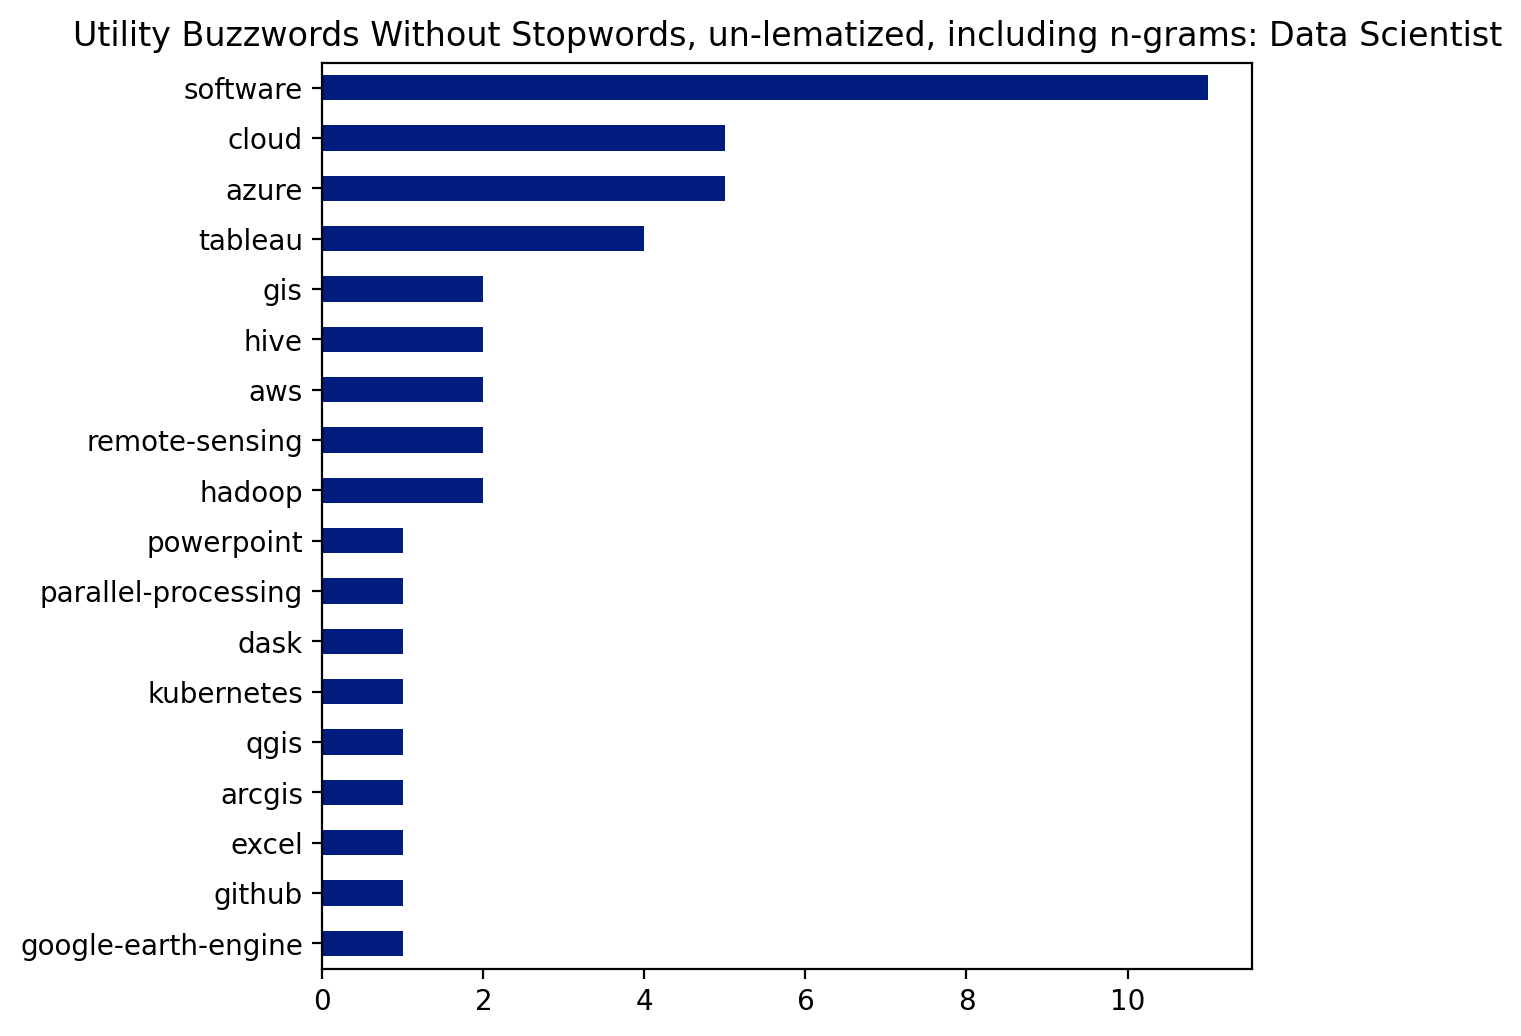

In [54]:
plt.figure(dpi=200)
pd.Series(buzz_util).value_counts().head(20).sort_values().plot(kind='barh', figsize=(6,6))
plt.title("Utility Buzzwords Without Stopwords, un-lematized, including n-grams: Data Scientist");

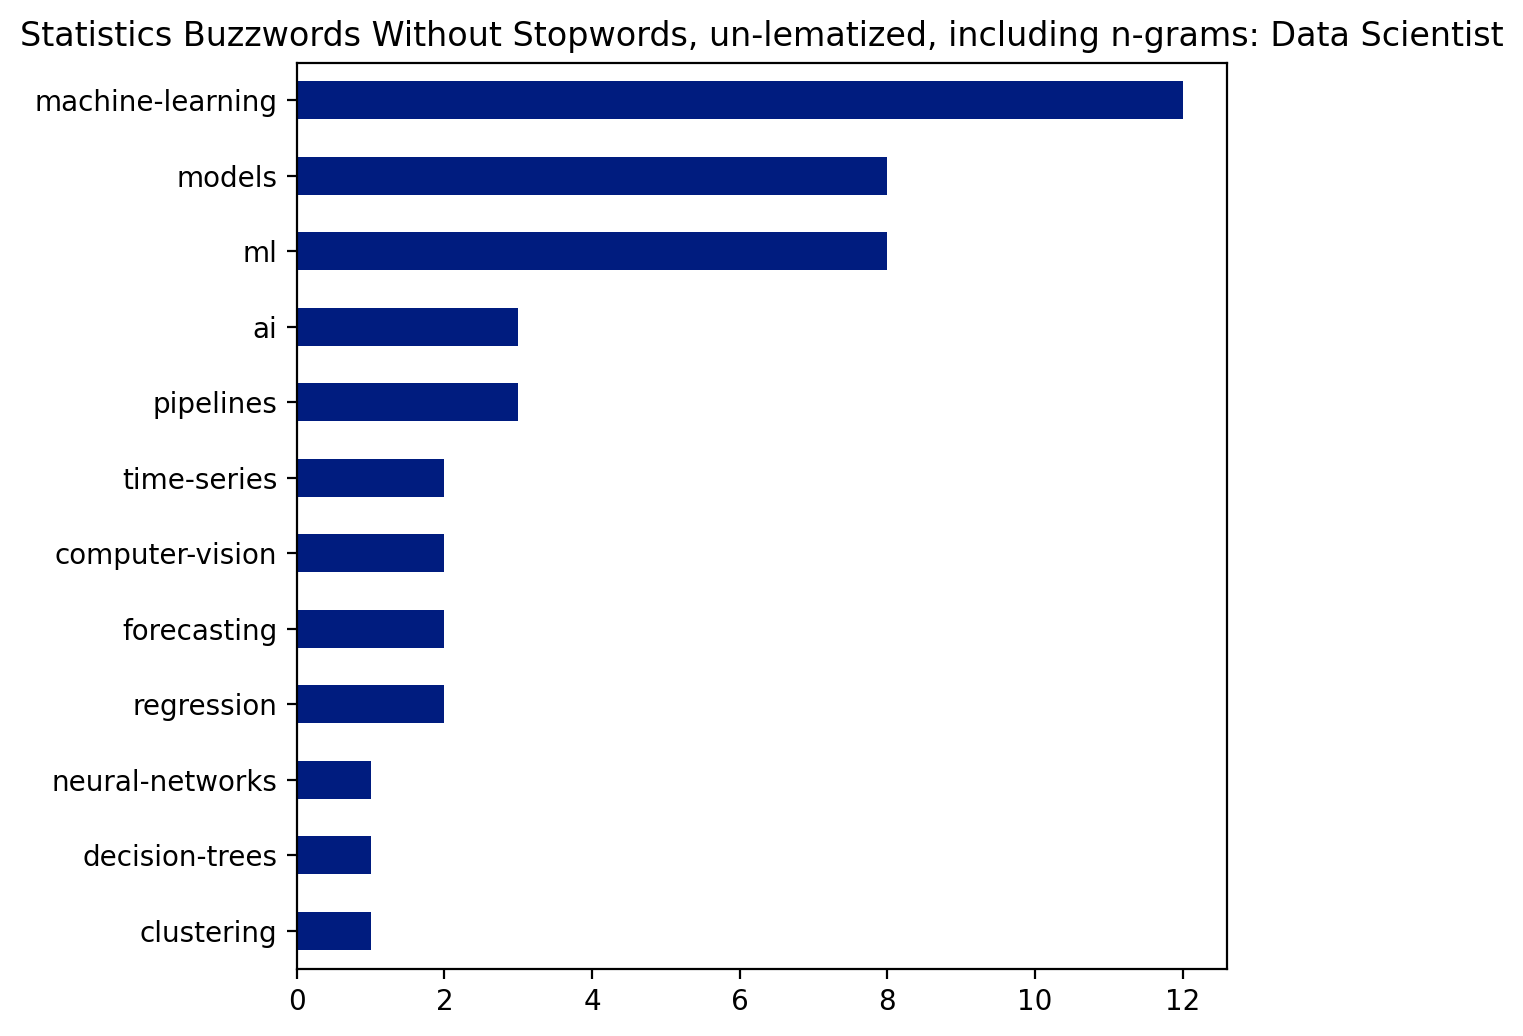

In [55]:
plt.figure(dpi=200)
pd.Series(buzz_stat).value_counts().head(20).sort_values().plot(kind='barh', figsize=(6,6))
plt.title("Statistics Buzzwords Without Stopwords, un-lematized, including n-grams: Data Scientist");